In [90]:
# import librairs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, f1_score, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
from sklearn.cluster import KMeans # Added KMeans import
from sklearn.metrics import silhouette_score

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
data = pd.read_csv('/content/drive/MyDrive/Rainfall_1901_2016_PAK.csv')
data.head()

,Rainfall - (MM),Year,Month
0,40.4258,1901,January
1,12.3022,1901,February
2,25.5119,1901,March
3,14.2942,1901,April
4,38.3046,1901,May


In [59]:
data = pd.read_csv('/content/drive/MyDrive/Rainfall_1901_2016_PAK.csv')

In [60]:
df.shape

(1392, 3)

In [61]:
data.columns

Index(['Rainfall - (MM)', ' Year', 'Month'], dtype='object')

In [62]:
data.rename(columns={'Rainfall - (MM)':'Rainfall-(mm)',' Year':'Year'},inplace=True)
data.columns

Index(['Rainfall-(mm)', 'Year', 'Month'], dtype='object')

In [63]:
data.head(10)

,Rainfall-(mm),Year,Month
0,40.42580,1901,January
1,12.30220,1901,February
2,25.51190,1901,March
3,14.29420,1901,April
4,38.30460,1901,May
5,12.88130,1901,June
6,68.09300,1901,July
7,16.58360,1901,August
8,13.33910,1901,September
9,3.10757,1901,October


In [64]:
plt.figure(figsize=(15,8))
graph=px.bar(data.loc[(data.Year>=1990)],x="Year",y="Rainfall-(mm)",hover_name='Month',color='Month',title='Rainfall During 2000 to 2016')
graph.show()


<Figure size 1500x800 with 0 Axes>

In [65]:
graph=px.bar(data.loc[(data.Year>=2000)],x="Year",y="Rainfall-(mm)",color="Month",title='Rainfall During 2000 to 2016 Using Animation'
              ,animation_frame="Year",animation_group="Month",log_x=True,range_x=[1999,2017], range_y=[0,400])
graph.show()

In [66]:
graph=px.line(data.loc[(data.Year>=1980)].loc[(data.Year<=2000)],x='Year',y='Rainfall-(mm)',color='Month',title='Rainfall in Year 2001 to 2016 ')
graph.show()

In [67]:
sel=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=1980)].loc[(data.Year<=2000)].loc[(data.Month=="June")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph=px.line(sel,x='Year',y='Rainfall-(mm)',color='Month',range_x=[1979,2001],text='Rainfall-(mm)',title='Rainfall in June Year 1980 to 2000')
graph.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph.show()
sel1=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=2001)].loc[(data.Year<=2016)].loc[(data.Month=="June")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph1=px.line(sel1,x='Year',y='Rainfall-(mm)',color='Month',range_x=[2000,2017],text='Rainfall-(mm)',title='Rainfall in June during Year 20001 to 2016')
graph1.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph1.show()

In [68]:
sel=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=1980)].loc[(data.Year<=2000)].loc[(data.Month=="July")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph=px.line(sel,x='Year',y='Rainfall-(mm)',color='Month',range_x=[1979,2001],text='Rainfall-(mm)',title='Rainfall in July Year 1980 to 2000')
graph.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph.show()
sel1=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=2001)].loc[(data.Year<=2016)].loc[(data.Month=="July")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph1=px.line(sel1,x='Year',y='Rainfall-(mm)',color='Month',range_x=[2000,2017],text='Rainfall-(mm)',title='Rainfall in July during Year 2001 to 2016')
graph1.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph1.show()

In [69]:
sel=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=1980)].loc[(data.Year<=2000)].loc[(data.Month=="August")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph=px.line(sel,x='Year',y='Rainfall-(mm)',color='Month',range_x=[1979,2001],text='Rainfall-(mm)',title='Rainfall in August Year 1980 to 2000')
graph.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph.show()
sel1=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=2001)].loc[(data.Year<=2016)].loc[(data.Month=="August")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph1=px.line(sel1,x='Year',y='Rainfall-(mm)',color='Month',range_x=[2000,2017],text='Rainfall-(mm)',title='Rainfall in August during Year 2001 to 2016')
graph1.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph1.show()

In [70]:
sel=data[['Rainfall-(mm)','Year']].loc[(data.Year>=2000)]
# Changed {'Rainfall-(mm)','Year'} to ['Rainfall-(mm)','Year'] to select columns using a list instead of a set.

fig=px.pie(sel,values='Rainfall-(mm)',color='Year',names='Year',labels='Year',width=800,height=600,hole=0.5,title='Number of Percent Rainfall  Year during 2000 to 2016')
fig.show()

In [71]:
# Convert object (months) to numeric

# Create a dictionary to map month names to numerical values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Assuming 'data' is your original DataFrame, create a copy named 'df_clean'
df_clean = data.copy()  # Create a copy of 'data' and assign it to 'df_clean'

# Use the map function to apply the mapping to the 'Month' column
df_clean['Month'] = df_clean['Month'].map(month_mapping)

df_clean['Month'] = df_clean['Month'].astype("int64")

In [72]:
df_clean.dtypes

,0
Rainfall-(mm),float64
Year,int64
Month,int64


In [73]:
df_clean.corr()

,Rainfall-(mm),Year,Month
Rainfall-(mm),1.000000,4.031776e-02,-2.040887e-01
Year,0.040318,1.000000e+00,-6.005667e-18
Month,-0.204089,-6.005667e-18,1.000000e+00


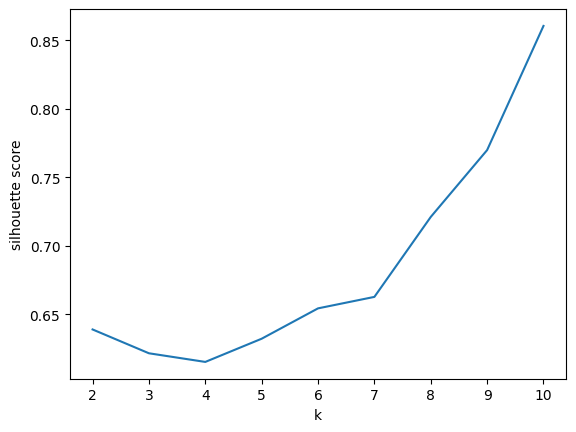

In [96]:
import matplotlib.pyplot as plt
plt.plot(range(2, 11), sscores)
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.show()

<Axes: >

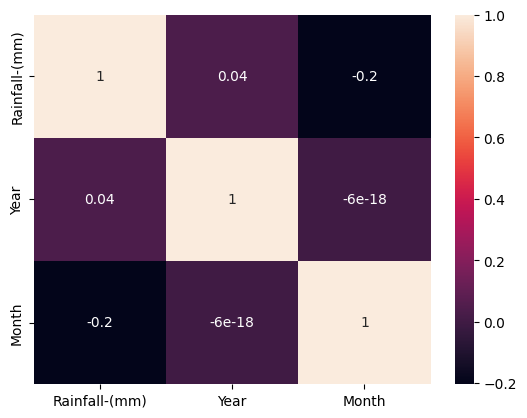

In [74]:
sns.heatmap(df_clean.corr(numeric_only=True), annot=True)

In [75]:
# Preprocess dataset
# Convert categorical 'Month' into numerical values
# Convert categorical 'Year' into numerical values
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])

In [76]:
# Define features and targets
X = df[['Month']]
Y_reg = df['Rainfall - (MM)']  # Regression target
Y_clf = (Y_reg > Y_reg.mean()).astype(int)  # Classification target

In [77]:
# Handle missing values
X = X.fillna(method='ffill')
Y_reg = Y_reg.fillna(method='ffill')

<ipython-input-77-11fb7323f1f9>:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-77-11fb7323f1f9>:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [78]:
# Split dataset
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, Y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, Y_clf, test_size=0.2, random_state=42)

In [79]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# Initialize models
models_reg = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "k-Nearest Neighbors": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=500)
}
models_clf = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=500)
}

In [81]:
# Hyperparameter tuning
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "k-Nearest Neighbors": {
        "n_neighbors": [3, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2]
    },
    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "alpha": [0.0001, 0.001, 0.01]
    }
}

In [82]:
# Train and evaluate regression models
print("Regression Models:\n")
for name, model in models_reg.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train_reg)
        model = grid_search.best_estimator_
    else:
        model.fit(X_train_scaled, y_train_reg)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test_reg, predictions)
    r2 = r2_score(y_test_reg, predictions)
    print(f"{name}: Mean Squared Error = {mse:.4f}, R² Score = {r2:.4f}")

Regression Models:

Linear Regression: Mean Squared Error = 433.2789, R² Score = 0.1204
Decision Tree: Mean Squared Error = 271.6795, R² Score = 0.4485
Random Forest: Mean Squared Error = 270.7143, R² Score = 0.4504
Support Vector Machine: Mean Squared Error = 388.9295, R² Score = 0.2104
k-Nearest Neighbors: Mean Squared Error = 267.6529, R² Score = 0.4566
Gradient Boosting: Mean Squared Error = 271.5623, R² Score = 0.4487


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

Neural Network: Mean Squared Error = 351.8448, R² Score = 0.2857


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



In [86]:
# Train and evaluate classification models
print("\nClassification Models:\n")
for name, model in models_clf.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train_clf)
        model = grid_search.best_estimator_
    else:
        model.fit(X_train_scaled, y_train_clf)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_clf, predictions)
    recall = recall_score(y_test_clf, predictions)
    f1 = f1_score(y_test_clf, predictions)
    print(f"{name}: Accuracy = {accuracy:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")


Classification Models:

Logistic Regression: Accuracy = 0.6093, Recall = 0.3271, F1-Score = 0.3911
Decision Tree: Accuracy = 0.7849, Recall = 0.5888, F1-Score = 0.6774
Random Forest: Accuracy = 0.7849, Recall = 0.5888, F1-Score = 0.6774
Support Vector Machine: Accuracy = 0.7204, Recall = 0.5701, F1-Score = 0.6100
k-Nearest Neighbors: Accuracy = 0.7957, Recall = 0.6822, F1-Score = 0.7192
Gradient Boosting: Accuracy = 0.7455, Recall = 0.6449, F1-Score = 0.6603


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

Neural Network: Accuracy = 0.7814, Recall = 0.6729, F1-Score = 0.7024


In [95]:
# Assuming 'df_clean' is your DataFrame from previous steps, and 'Month' is the feature you want to cluster:
Xs = df_clean[['Month']].values  # Extract the 'Month' feature values into a NumPy array

sscores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=10).fit(Xs)
    score = silhouette_score(Xs, km.labels_)
    sscores.append(score)
    print(f"k={k}, score={score}")

k=2, score=0.6388558285807546
k=3, score=0.6214544914328931
k=4, score=0.6151456884534607
k=5, score=0.6320917421781974
k=6, score=0.6542574087242675
k=7, score=0.6626355469680025
k=8, score=0.721019721019721
k=9, score=0.7698412698412699
k=10, score=0.8605098605098606
